In [29]:
dominant_type_data = []
path = "V3top_dominant_type_data_processed.tsv"
with open(path) as dominant_type_data_file: 
    for record in dominant_type_data_file.readlines():
        dominant_type_data.append(record.strip().split("\t"))

In [30]:
print(len(dominant_type_data))
dominant_type_data_clean = []
entries_greater_than_five = 0
for record in dominant_type_data:
    if len(record) >= 3:
        entries_greater_than_five += 1
        dominant_type_data_clean.append(record)
    else:
        print(record)
print(entries_greater_than_five)

1231932
['088235e2-6391-4024-8c48-fac6e165f7f4']
['1f501819-9b41-da40-5852-da734a1ac875']
['6bedd8d7-81cc-4f5f-b03e-963b1326e777']
['2272af36-41e4-dfdf-8c20-58abec665633']
['4a7814a3-c959-ec54-e62d-2148541a3ad2']
['375aaf57-b57d-caa0-19a7-84e8546894e5']
['3aadb90e-0b23-f5c1-c53e-807e305b31b9']
['2536acbd-628f-9b56-6200-f0ecc001bd44']
['4e51fd24-edd0-4499-a4e9-85c1dccf60be']
['2e0b7e94-03da-1318-35fb-6a72a6a0a81a']
['3aac5fba-5242-97bc-d09f-1e911ccb049a']
['005d3433-e577-31a8-aebc-4e050b44d836']
['79f553dc-555d-d71d-97f6-45e1dfaf7582']
['4ebe114b-9535-65b1-e174-89a253b81aed']
['32a98f6d-495e-c900-a159-01339eca7016']
['7b9508a3-5560-a48d-3de0-a6a910d2241d']
['6de7501e-8852-7b38-e85d-e2b52f5ac0c8']
['5d64423b-80d5-712b-df08-e114efd247e7']
['f94ab01b-1bb2-3823-f0a8-a421834748ed']
['e8c477be-24e3-7394-fd66-83f1fae4003a']
['85a099ae-2584-7a3a-2e99-48ea1f47474c']
['99a7dd26-b814-1ebf-4245-32a00a916a1f']
['c6f12c53-f690-5248-f32c-73f318b2bdd6']
['c3c14367-6143-038e-03d5-3a38e13c3ab8']
['f43b9e

In [31]:
all_dominant_types = set()
sid_data = {}
for record in dominant_type_data_clean:
    if record[0] in sid_data:
        sid_data[record[0]].append(record)
    else:
        sid_data[record[0]] = [record]
    all_dominant_types.add(record[0])
print(len(all_dominant_types))


429027


In [32]:
sid_data_entries = []
for sid in sid_data:
    sid_data_entries.append(len(sid_data[sid]))

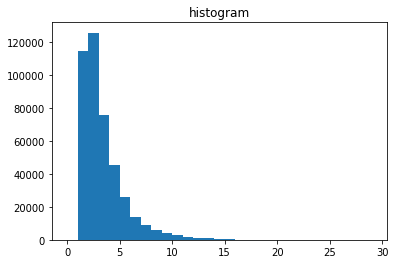

In [33]:
from matplotlib import pyplot as plt 
import numpy as np  
   
a = np.array(sid_data_entries) 
plt.hist(a, bins = [counter for counter in range(30)]) 
plt.title("histogram") 
plt.show()

In [34]:
printed_ones = False
for sid in sid_data:
    if len(sid_data[sid]) == 5:
        if not printed_ones:
            for records in sid_data[sid]:
                print(records[1:3])
            printed_ones = True



['"Drummer for the band Superchunk and The Mountain Goats who has also worked as a comedian on The Best Show on WFMU."^^mso:text@en', 'mso/music.artist']
['"Hey, t-shirt, leave those kids alone!"^^mso:text@en', 'mso/music.artist']
['"Jon Wurster is an actor and writer, known for Ant-Man and the Wasp (2018), Yes Man (2008) and Monk (2002)."^^mso:text@en', 'mso/music.artist']
['"Jonathan Patrick "Jon" Wurster is an American musician and humorist best known as the drummer for indie rockers Superchunk and The Mountain Goats, as well for his comedic work with radio host Tom Scharpling on the The Best Show on WFMU. Wurster has recorded and/or performed live with artists such as Bob Mould, Jay Farrar, Ben Gibbard, Robert Pollard, Katy Perry, The New Pornographers, Rocket from the Crypt, Ryan Adams, R.E.M., Guided by Voices, Marah, Alejandro Escovedo, A.C. Newman, Chris Stamey and Peter Holsapple, Inspiral Carpets, The Minus 5, and Charlie Daniels."^^mso:text@en', 'mso/music.artist']
['"Jonath

In [35]:
sid_data_top_10_desc = {}
for sid in sid_data:
    if len(sid_data[sid]) <= 10:
        sid_data_top_10_desc[sid] = sid_data[sid]

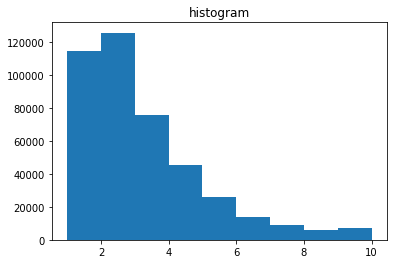

In [36]:
sid_data_top_10_desc_entries = []
for sid in sid_data_top_10_desc:
    sid_data_top_10_desc_entries.append(len(sid_data_top_10_desc[sid]))
    
a = np.array(sid_data_top_10_desc_entries) 
plt.hist(a, bins = [counter for counter in range(1,11)]) 
plt.title("histogram") 
plt.show()

In [37]:
import re
def get_content_label(sid_content_dominanttype):
    content = ""
    label = ""
    sid = ""
    for record in sid_content_dominanttype:
        record_fields = record
        if sid == "":
            sid = record_fields[0]
            record_fields[1] = re.sub(r"\^\^.*", "", record_fields[1])  
            record_fields[1] = re.sub(r"\"", "", record_fields[1])
            content = record_fields[1] + " "
            label = record_fields[2]
        if sid != "":
            assert sid == record_fields[0]
            #assert label == record_fields[2]
            if label != record_fields[2]:
                print("More than one label for : ", sid, " ", record_fields[2])
                return None
            record_fields[1] = re.sub(r"\^\^.*", "", record_fields[1]) 
            record_fields[1] = re.sub(r"\"", "", record_fields[1]) 
            content += record_fields[1] + " "
    return [content,label]
            
    

In [38]:
for sid in sid_data_top_10_desc:
    if sid == "http://knowledge.microsoft.com/0000145a-66bf-1880-35b6-41b9bd03b28e":
        for record in sid_data_top_10_desc[sid]:
            print(record)

In [39]:
sid_concatenate_data = {}
for sid in sid_data_top_10_desc:
    data = get_content_label(sid_data_top_10_desc[sid])
    if data:
        sid_concatenate_data[sid] = data

More than one label for :  0ce7a5a8-bca2-a0c7-fe5a-98314af72cd1   mso/film.actor
More than one label for :  1681a88d-0df5-b549-771f-ec48d22c2ee9   mso/film.story_contributor
More than one label for :  1cc0d88a-460e-c595-da26-e42a84480fe0   mso/business.board_member
More than one label for :  1ea30a0c-e7b6-a464-68c4-43c5c12e7583   mso/royalty.noble_person
More than one label for :  0e638e04-b0a5-3d7f-2366-49c995ba8360   mso/music.group
More than one label for :  2a428945-eb0d-ad9a-1fc1-9d6c27c07927   mso/music.group
More than one label for :  38e1b1c9-f760-6211-9ec3-77741d028afa   mso/tv.actor
More than one label for :  498f23c2-fd68-36c9-5342-ada3db7fb9df   mso/visual_art.visual_artist
More than one label for :  48202c82-a705-2d85-2541-0bd4c62cfb7c   mso/people.person
More than one label for :  54c282c4-2fba-ecfb-1e4e-bfeb8328dd63   mso/people.person
More than one label for :  3ffba30a-b98d-107c-4cd3-2c42c6e6d214   mso/olympics.athlete
More than one label for :  63481da7-2961-443b-9cb1

More than one label for :  7dfc2050-a6ea-6779-a446-eb985ab227b3   mso/film.story_contributor
More than one label for :  0d67468f-853d-8d0c-1ef5-f53249d74094   mso/olympics.athlete
More than one label for :  632d4e81-107f-9d81-532a-4c21f8f136e2   mso/people.person
More than one label for :  481c5faf-28ee-48bd-982b-beaba994458b   mso/people.person
More than one label for :  77bb1699-a568-493b-a7ec-a63028985709   mso/film.set_designer
More than one label for :  50de0637-d0c7-45b5-a09e-1e2c09791399   mso/sports.pro_athlete
More than one label for :  580791c3-217d-9751-b848-48b6cce3995a   mso/film.director
More than one label for :  065ebc1a-9a8c-5ede-88c3-9194303506e2   mso/visual_art.visual_artist
More than one label for :  37772c8b-94e1-471d-acaf-2876aad1c323   mso/music.composer
More than one label for :  0ca299d9-e59b-77e0-b0f3-384fb05d1612   mso/music.group
More than one label for :  0cdd7a64-b677-f565-a74c-f00bd6024560   mso/film.production_designer
More than one label for :  1a1ecf8

More than one label for :  c0ab8024-a320-43af-a40e-be07a7330a54   mso/music.group
More than one label for :  ea006f79-16dc-4f92-b697-a37a79c0cf20   mso/people.deceased_person
More than one label for :  cbf3f894-a867-f632-f753-db4c0428ef12   mso/people.person
More than one label for :  d7d6e1e4-ed95-6764-43de-561738ceca8e   mso/olympics.athlete
More than one label for :  fe17a8d8-f781-3e9e-f97e-2861d1944808   mso/people.person
More than one label for :  c12f84dd-c3da-2bc3-513a-144b2e42228e   mso/sports.pro_athlete
More than one label for :  9750b096-d461-d1b4-bb02-8cc23232ed74   mso/government.u_s_congressperson
More than one label for :  9aff8c23-9ec8-5a7a-c855-29bac73b2006   mso/film.actor
More than one label for :  a54ef3f1-2adf-8316-1072-9e6b0bf9287f   mso/soccer.player
More than one label for :  e4be1487-7fe2-29e5-3c84-67f3440003f1   mso/tv.actor
More than one label for :  a075ba41-940e-926e-7837-a56bc6b3d9a6   mso/film.actor
More than one label for :  ec95d3b9-d5dd-4a33-90dc-9a8e2

More than one label for :  f0424c94-77a5-6f78-7ff5-c30c96421d3a   mso/law.legal_case
More than one label for :  e86434d9-2d76-7d98-a77f-1e9c35b6234a   mso/government.politician
More than one label for :  b37cfac9-e5dd-c421-423c-b0de8c391109   mso/soccer.player
More than one label for :  e23ace17-21be-4a35-954d-26e735c5074e   mso/sports.pro_athlete
More than one label for :  80e7d561-2bf8-4a09-d486-33906d856fb4   mso/tv.writer
More than one label for :  b20dbfd3-05b6-4b90-3d1f-b12b575d5797   mso/tv.producer
More than one label for :  85c59edf-318b-3a89-d432-33701e05c49f   mso/tv.program_creator
More than one label for :  8d73858f-1750-7cee-2010-ed8f0df71988   mso/film.actor
More than one label for :  e91e2e9e-7811-b6c8-54ad-40f868c17387   mso/tv.actor
More than one label for :  a7975a29-6a38-0152-1987-6a24fed72209   mso/people.person
More than one label for :  f5615030-977c-72d8-0767-8d66ea28f511   mso/visual_art.visual_artist
More than one label for :  9c9cf338-8a16-0876-9ca0-13203d552

In [40]:
print(len(sid_data_top_10_desc))
print(len(sid_concatenate_data))

423793
423437


In [41]:
def print_one_entry(in_data):
    printed_ones = False
    for sid in in_data:
        if not printed_ones:
            for records in in_data[sid]:
                print(records)
                printed_ones = True

In [42]:
#print_one_entry(sid_concatenate_data)
sid_with_domtype = {}
records_with_domtype = 0
for sid in sid_concatenate_data:
    if (len(sid_concatenate_data[sid]) == 2) and (sid_concatenate_data[sid][1] != ""):
        sid_with_domtype[sid] = sid_concatenate_data[sid]
        records_with_domtype += 1
print("Total records : ",len(sid_concatenate_data))
print("Records with domtype : ",records_with_domtype)
print("Records with domtype : ",len(sid_with_domtype))


Total records :  423437
Records with domtype :  365847
Records with domtype :  365847


In [43]:
#Lets calculate the total dom_types and counts
domtype_frequency = {}
for sid in sid_with_domtype:
    if sid_with_domtype[sid][1] in domtype_frequency:
        domtype_frequency[sid_with_domtype[sid][1]] += 1
    else:
        domtype_frequency[sid_with_domtype[sid][1]] = 1

In [44]:
for actor in domtype_frequency:
    print(actor, "\t", domtype_frequency[actor])

mso/film.actor 	 142755
mso/film.editor 	 454
mso/book.author 	 7768
mso/soccer.player 	 1404
mso/baseball.player 	 1498
mso/media_common.actor 	 95607
mso/tv.actor 	 14442
mso/music.artist 	 26981
mso/people.deceased_person 	 5496
mso/people.person 	 19550
mso/music.composer 	 1342
mso/film.director 	 8794
mso/film.producer 	 2762
mso/music.group 	 3091
mso/tv.writer 	 1461
mso/film.cinematographer 	 832
mso/martial_arts.martial_artist 	 484
mso/film.story_contributor 	 445
mso/government.politician 	 3115
mso/fictional_universe.person_in_fiction 	 51
mso/film.crewmember 	 2229
mso/visual_art.visual_artist 	 1099
mso/sports.pro_athlete 	 2012
mso/comic_books.creator 	 83
mso/basketball.player 	 565
mso/food.chef 	 122
mso/olympics.athlete 	 845
mso/american_football.player 	 1640
mso/law.criminal 	 41
mso/film.writer 	 1826
mso/geography.mountaineer 	 83
mso/award.winner 	 2115
mso/royalty.monarch 	 55
mso/film.art_director 	 110
mso/boxing.boxer 	 544
mso/tv.personality 	 1932
mso/ar

In [48]:
counter = 0
for sid in sid_with_domtype:
    if sid_with_domtype[sid][1] == "mso/music.artist":
        counter += 1
        if counter <7:
            print(sid_with_domtype[sid])

['Drummer for the band Superchunk and The Mountain Goats who has also worked as a comedian on The Best Show on WFMU. Drummer for the band Superchunk and The Mountain Goats who has also worked as a comedian on The Best Show on WFMU. Hey, t-shirt, leave those kids alone! Jon Wurster is an actor and writer, known for Ant-Man and the Wasp (2018), Yes Man (2008) and Monk (2002). Jonathan Patrick Jon Wurster is an American musician and humorist best known as the drummer for indie rockers Superchunk and The Mountain Goats, as well for his comedic work with radio host Tom Scharpling on the The Best Show on WFMU. Wurster has recorded and/or performed live with artists such as Bob Mould, Jay Farrar, Ben Gibbard, Robert Pollard, Katy Perry, The New Pornographers, Rocket from the Crypt, Ryan Adams, R.E.M., Guided by Voices, Marah, Alejandro Escovedo, A.C. Newman, Chris Stamey and Peter Holsapple, Inspiral Carpets, The Minus 5, and Charlie Daniels. Jonathan Patrick Wurster (born October 31, 1966) i